In [1]:
import os
import glob
import xml.etree.ElementTree as ET
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
xml_folder_path = './data/annotations' 

def analyze_dataset_labels(folder_path):
    xml_files = glob.glob(os.path.join(folder_path, '*.xml'))
    
    if not xml_files:
        print(f"không tìm thấy file xml trong '{folder_path}'")
        return

    print(f"Đang phân tích {len(xml_files)} file XML...")
    
    label_counter = Counter()
    total_objects = 0
    
    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()
            
            for obj in root.findall('object'):
                name = obj.find('name').text
                label_counter[name] += 1
                total_objects += 1
                
        except Exception as e:
            print(f"Lỗi khi xử lý file {xml_file}: {e}")
            continue

    print("\n" + "="*40)
    print(f"TỔNG SỐ ĐỐI TƯỢNG (BOXES): {total_objects}")
    print("="*40)
    print(f"{'Tên Label':<25} | {'Số lượng':<10} | {'Tỉ lệ %':<10}")
    print("-" * 50)
    
    for label, count in label_counter.most_common():
        percentage = (count / total_objects) * 100
        print(f"{label:<25} | {count:<10} | {percentage:.2f}%")
    print("="*40)

analyze_dataset_labels(xml_folder_path)

Đang phân tích 853 file XML...

TỔNG SỐ ĐỐI TƯỢNG (BOXES): 4072
Tên Label                 | Số lượng   | Tỉ lệ %   
--------------------------------------------------
with_mask                 | 3232       | 79.37%
without_mask              | 717        | 17.61%
mask_weared_incorrect     | 123        | 3.02%


Đang phân tích 853 file...

THỐNG KÊ KÍCH THƯỚC ẢNH
Tổng số ảnh: 853
Chiều rộng (Width): Min=193, Max=600, TB=371
Chiều cao (Height): Min=156, Max=600, TB=309
------------------------------
5 Kích thước phổ biến nhất (W x H):
  301 x 400 : 184 ảnh
  400 x 267 : 143 ảnh
  400 x 225 : 88 ảnh
  400 x 300 : 51 ảnh
  400 x 226 : 50 ảnh


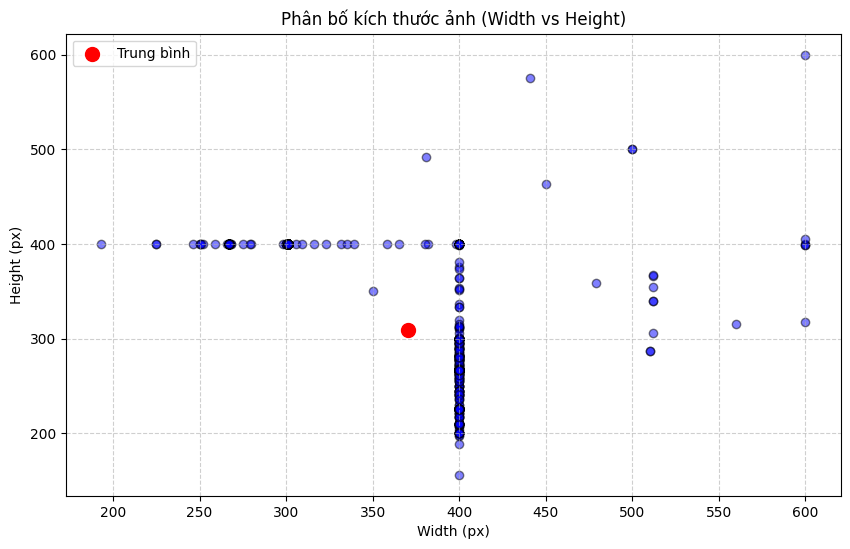

In [ ]:
def analyze_image_sizes(directory):
    xml_files = glob.glob(os.path.join(directory, "*.xml"))
    
    if not xml_files:
        print("ko có file xml")
        return

    widths = []
    heights = []
    ratios = [] 

    print(f"Đang phân tích {len(xml_files)} file...")

    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()
            
            size = root.find('size')
            w = int(size.find('width').text)
            h = int(size.find('height').text)
            
            widths.append(w)
            heights.append(h)
            ratios.append(w / h)
            
        except Exception as e:
            print(f"Lỗi đọc file {xml_file}: {e}")

    widths = np.array(widths)
    heights = np.array(heights)

    print("\n" + "="*30)
    print("THỐNG KÊ KÍCH THƯỚC ẢNH")
    print("="*30)
    print(f"Tổng số ảnh: {len(widths)}")
    print(f"Chiều rộng (Width): Min={widths.min()}, Max={widths.max()}, TB={widths.mean():.0f}")
    print(f"Chiều cao (Height): Min={heights.min()}, Max={heights.max()}, TB={heights.mean():.0f}")
    print("-" * 30)
    
    dims = list(zip(widths, heights))
    from collections import Counter
    common_dims = Counter(dims).most_common(5)
    print("5 Kích thước phổ biến nhất (W x H):")
    for dim, count in common_dims:
        print(f"  {dim[0]} x {dim[1]} : {count} ảnh")

    plt.figure(figsize=(10, 6))
    plt.scatter(widths, heights, alpha=0.5, c='blue', edgecolors='k')
    plt.title("Phân bố kích thước ảnh (Width vs Height)")
    plt.xlabel("Width (px)")
    plt.ylabel("Height (px)")
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.scatter(widths.mean(), heights.mean(), color='red', s=100, label='Trung bình', zorder=5)
    plt.legend()
    plt.show()
analyze_image_sizes(xml_folder_path)